In [1]:
%run Latex_macros.ipynb
%run beautify_plots.py

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import svm_helper
%aimport svm_helper
svmh = svm_helper.SVM_Helper()


# Classification: Loss function

It would be natural to expect the Average Loss to be Accuracy (fraction of correct predictions).

On a per example basis, the corresponding loss $\loss^\ip$ would be either 1 or 0, depending on correctness.


This is not the case.

Recall the mapping of probability to prediction

$$
\hat{\y}^\ip = 
\left\{
    {
    \begin{array}{lll}
     \text{Negative} & \textrm{if } \hat{\mathbf{p}}^\ip   < 0.5  \\
     \text{Positive}& \textrm{if } \hat{\mathbf{p}}^\ip \ge 0.5 
    \end{array}
    }
\right.
$$

The prediction for example $i$ changes only when probability $\hat{p}^\ip$ crosses the threshold.

Suppose the class for example $i$ is Positive: $\y^\ip = \text{Positive}$.
- Is our model "better" when our prediction is "more certain" (extreme probability)
$$
\begin{array}[lll]\\
\hat{\mathbf{p}}^\ip &  \approx 1 & \text{ than when  }       &\hat{\mathbf{p}}^\ip  = 0.5\\
\hat{\mathbf{p}}^\ip &  = (.5 - \epsilon) & \text{ than when  } & \hat{\mathbf{p}}^\ip  \approx 0\\
\end{array}
$$

- The per-example Accuracy is the same in both comparisons
- But a model with probability $\hat{p}^\ip$ closer to $1$ for a Positive example $i$ would seem to better

There is no *degree* or magnitude of inaccuracy
- Two models may have the same Accuracy even though the probabilities of one may be closer to perfect than the other
- In our search for the best $\Theta$, Accuracy won't be a guide

In mathematical terms: we want our Loss function be be continuous and differentiable.

Accuracy (and the per-example analog) satisfies neither.

We will introduce Binary Cross Entropy loss to overcome this difficulty.

Think of Binary Cross Entropy as a continuous analog of Accuracy.

# Binary Cross Entropy

Let's encode the Positive labels $\y^\ip$ with the number 1 and Negative labels with the number 0.
The loss for example $i$ will be defined as
$$
\loss^\ip_\Theta =
\begin{cases}
- \log(\hat{\mathbf{p}}^\ip) & \textrm{if } & \y^\ip = 1 \\
- \log(1-\hat{\mathbf{p}}^\ip)     & \textrm{if } & \y^\ip = 0 \\
\end{cases}
$$

Note the negative signs:
- The term being negated is a Utility (which we want to maximize)

A plot will give us some intuition.

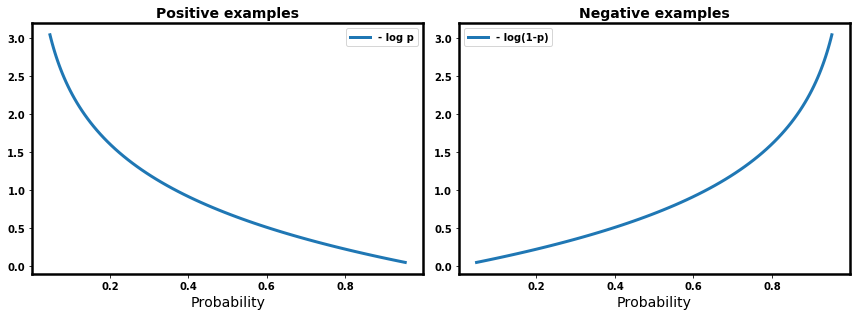

In [4]:
svmh.plot_log_p(x_axis="Probability")

- For Positive examples: the loss approaches $0$ as the predicted probability approaches the correct value ($1$).
- For Negative examples:  the loss approaches $0$ as the predicted probability approaches the correct value ($0$).

In a Deep Dive (after the introduction of a bit of math) we will gain a greater appreciation it's meaning.

For now: be content that Binary Cross Entropy seems to have the right slope and asymptotic behavior.




Because only one of $\y^\ip$ and $(1-\y^\ip)$ is non zero, we  can re-write the two-case statement into a single expression

$$
\loss^\ip_\Theta = - \left( \y^\ip*\log(\hat{\mathbf{p}}^\ip) + (1-\y^\ip) * \log(1-\hat{\mathbf{p}}^\ip) \right)
$$

This expression is referred to as *Binary Cross Entropy*; it and the multi-class version
will become quite familiar going forward.


The Loss for the entire training set is simply the average (across examples) of the Loss for the example

$$
\loss_\Theta  = { 1\over{m} } \sum_{i=1}^m \loss^\ip_\Theta
$$

# Loss function for Multinomial Classification: Cross Entropy

A Multinomial Classifier (when categories/classes $||C|| > 2$) can be created from multiple Binary Classifiers
- Create a separate Binary Classifier for each $c \in C$
- The classifier for category $c$ attempts to classify
    - Each example with target category of $c$ as Positive
    - All other examples as Negative
- Combine the $||C||$ classifiers to produce a vector $\hat{p}$ of length $||C||$
    - normalize across $c \in C$ to sum to $1$
    - $\hat{\mathbf{p}}_c$ denotes the normalized value for category $c$
        - **Notation abuse**: subscripts should be integers, not categories

Both the target $\y$ and the prediction $\hat{p}$ are represented as vectors of length $||C||$
- We write $\y_c, \hat{p}_c$ to denote the element of the vector corresponding to category $c$
- Each vector can be interpreted as a probability distribution, e.g.
$$
\begin{array}[lll]\\
\forall c \in C: \y_c \ge 0 \\
\sum_{c \in C} { \y_c } =1
\end{array}
$$
    - $\y$  was created with One Hot Encoding (OHE), so properties satisfied by construction
    - $\hat{p}_c$ satisfies the properties by virtue of the normalization of the predictions of the $||C||$ binary classifiers

With $\y, \hat{p}$ encoded as a vectors, per example Binary Cross Entropy can be generalized to $||C|| \ge 2$ categories:

$$
\loss^\ip_\Theta = - \sum_{c=1}^{||C||}
\left(
{ \y_c^\ip * \textrm{log} (\hat{\mathbf{p}}_c^\ip)}
\right)
$$

This is the multinomial analog of Binary Cross Entropy and is called **Cross Entropy**.


Cross Entropy can be interpreted as a measure of the "distance" between distributions $\y$ and $\hat{\mathbf{p}}$
- Minimized when they are identical
- We will use Cross Entropy in the future both as a Loss function and a way of comparing probability distributions

In [5]:
print("Done")

Done
